In [17]:
# genetic algorithm search for continuous function optimization
import random
from numpy.random import randint
from numpy.random import rand
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from datetime import timedelta

import pandas as pd
import time
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Algoritma Genetika
def create_individual(length: int) -> str:
    return ''.join(random.choice('01') for _ in range(length))

In [3]:
# fitness function
def fitness(gen):        
    boolean_mask = [bool(int(x)) for x in gen]
    X_train_selected = X_train[:, boolean_mask]
    X_test_selected = X_test[:, boolean_mask]

    svm = SVC(kernel='poly', decision_function_shape='ovr', random_state=42)
    svm.fit(X_train_selected, y_train)
    y_pred = svm.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)

    return acc

In [4]:
def roulette_wheel_selection(population_with_fitness):
    total_fitness = sum(fitness for _, fitness in population_with_fitness)
    selection_probs = [fitness/total_fitness for _, fitness in population_with_fitness]
    parent_indices = np.random.choice(len(population_with_fitness), size=2, p=selection_probs, replace=False)
    return [population_with_fitness[i][0] for i in parent_indices]

In [5]:
def one_point_crossover(p1, p2):
    # children are copies of parents by default
    c1, c2 = p1, p2
    # check for recombination
    
    # select crossover point that is not on the end of the string
    crossover_point = randint(1, 120-2) #120 = jumlah maksimal kromosom

    # Convert the integers to binary strings and pad with leading zeros
    # bin1 = format(c1, '05b')
    # bin2 = format(c2, '05b')

    # Perform the crossover
    c1_new = c1[:crossover_point] + c2[crossover_point:]
    c2_new = c2[:crossover_point] + c1[crossover_point:]

    # Convert the new binary strings back to integers
    # new_int1 = int(bin1_new, 2)
    # new_int2 = int(bin2_new, 2)
    
    return [c1_new, c2_new]

In [6]:
def mutate(individual):
    #pilih bagian gen random yang dimutasi
    mutation_point = randint(0, 120-1) #120 jumlah maks gen

    # Convert the binary string to a list of binary
    binary_list = [int(digit) for digit in individual]

    # Flip the bit at the specified position
    if binary_list[mutation_point] == '0':
        binary_list[mutation_point] = '1'
    else:
        binary_list[mutation_point] = '0'

    new_binary_string = ''.join(str(digit) for digit in binary_list)
    return new_binary_string

In [7]:
#load dataset
DATA_PATH = "/Users/firmansyahsundana/Documents/education/semester-2/sains-komputasi/GLCMGeneticAlgorithm-SK/data/processed/glcm_kidney_illness_extended_dists.csv"
df = pd.read_csv(DATA_PATH)
X = df.iloc[:,1:-1]
y = df.label

#normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
population_size = 4
generations = 10
gen_length = 120 #1 fitur ada 4 sudut (0, 45, 90, 135) dan distance=1, 2, 3, 4, 5

population = [create_individual(gen_length) for _ in range(population_size)]

In [13]:
# start_time = time.time()
# best_fitness = []
# best_individuals = []
# for generation in range(generations):
#     generation_start_time = time.time()
#     print(f"\n=== Generation {generation+1}/{generations} ===")

#     # Hitung nilai fitness untuk setiap individu dalam populasi
#     population_with_fitness = []
#     for individual in population:
#         fitness_value = fitness(individual)
#         population_with_fitness.append((individual, fitness_value))
#         # Mencetak parameter individu saat ini
#         print(f"Pelatihan Dengan Individu Pilihan: "
#               f"gen: {individual}, "
#               f"Fitness: {fitness_value}")

#     # Pilih orang tua menggunakan roulette wheel selection
#     selected_parents = roulette_wheel_selection(population_with_fitness)
#     print("\nMemilih Parents Untuk Generasi Selanjutnya:")
#     for parent in selected_parents:
#         print(parent)

#     # Buat populasi baru melalui crossover dan mutasi
#     new_population = []
#     while len(new_population) < population_size:
#         parent1, parent2 = selected_parents
#         child1, child2 = one_point_crossover(parent1, parent2)
#         child1 = mutate(child1)
#         child2 = mutate(child2)
#         new_population.extend([child1, child2])
#         # Mencetak parameter anak-anak baru yang dihasilkan
#         print(f"Membuat Child dengan Crossover dan Mutasi:"
#               f"{child1}, {child2}")
#         print("")
#         print("")

#     # Potong populasi baru agar sesuai dengan ukuran populasi yang ditentukan
#     new_population = new_population[:population_size]

#     # Perbarui populasi dengan populasi baru
#     population = new_population
#     generation_end_time = time.time()
#     generation_duration = generation_end_time - generation_start_time
#     print(f"Waktu yang Dibutuhkan untuk Generasi {generation+1}: {str(timedelta(seconds=generation_duration))}")

#     #catat individu terbaik
#     current_best_individual = max(population, key=lambda ind: fitness(ind))
#     current_best_fitness = fitness(current_best_individual)
#     best_individuals.append(current_best_individual)
#     best_fitness.append(current_best_fitness)

# # Evaluasi individu terbaik setelah loop generasi selesai
# best_individual = max(population, key=lambda ind: fitness(ind))
# best_acc = ga.fitness(best_individual)
# print(f"Individu terbaik : "
#       f"gen: {best_individual}, "
#       f"Accuracy: {best_acc}")
# end_time = time.time()

In [19]:
start_time = time.time()
best_fitness = []
best_individuals = []

for generation in range(generations):
    generation_start_time = time.time()
    print(f"\n=== Generation {generation+1}/{generations} ===")

    # Hitung nilai fitness untuk setiap individu dalam populasi
    population_with_fitness = []
    for individual in population:
        fitness_value = fitness(individual)
        population_with_fitness.append((individual, fitness_value))
        # Mencetak parameter individu saat ini
        print(f"Pelatihan Dengan Individu Pilihan: "
              f"gen: {individual}, "
              f"Fitness: {fitness_value}")
    # Pilih orang tua menggunakan roulette wheel selection
    selected_parents = roulette_wheel_selection(population_with_fitness)
    print("\nMemilih Parents Untuk Generasi Selanjutnya:")
    for parent in selected_parents:
        print(parent)
        
    # Buat populasi baru melalui crossover dan mutasi
    new_population = []
    new_population_with_fitness = []
    while len(new_population) < population_size:
        parent1, parent2 = selected_parents
        child1, child2 = one_point_crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)

        #hitung fitness offspring
        fitness_value_c1 = fitness(child1)
        fitness_value_c2 = fitness(child2)
        # masukkan ke list
        new_population_with_fitness.append((child1, fitness_value_c1))
        new_population_with_fitness.append((child2, fitness_value_c2))
        
        new_population.extend([child1, child2])
        # Mencetak parameter anak-anak baru yang dihasilkan
        print(f"Membuat Child dengan Crossover dan Mutasi:"
              f"{child1}, {child2}")
        print("")
        print("")

    # Tambahkan populasi baru dengan populasi lama
    population_with_fitness = population_with_fitness + new_population_with_fitness
    
    # Urutkan individu berdasarkan nilai fitness
    sorted_population_fitness = sorted(population_with_fitness, key=lambda x: x[1], reverse=True) 
    sorted_population = [item[0] for item in sorted_population_fitness]

    # Hasil parent dan child
    print("Populasi baru (parent + child)")
    for ind_kromosom, ind_fitness in sorted_population_fitness:
        print(f"kromosom: {ind_kromosom}, fitness: {ind_fitness}")

    # Hanya melanjutkan individu" terbaik ke generasi selanjutnya
    population =  sorted_population[:population_size]
    
    generation_end_time = time.time()
    generation_duration = generation_end_time - generation_start_time
    print(f"Waktu yang Dibutuhkan untuk Generasi {generation+1}: {str(timedelta(seconds=generation_duration))}")

    #catat individu terbaik
    current_best_individual = sorted_population_fitness[0][0] #kromosom individu terbaik
    current_best_fitness = sorted_population_fitness[0][1] #fitness terbaik
    best_individuals.append(current_best_individual)
    best_fitness.append(current_best_fitness)
    
# Evaluasi individu terbaik setelah loop generasi selesai
best_individual = max(population, key=lambda ind: fitness(ind))
best_acc = fitness(best_individual)
print(f"Individu terbaik : "
      f"gen: {best_individual}, "
      f"Accuracy: {best_acc}")
end_time = time.time()


=== Generation 1/10 ===
Pelatihan Dengan Individu Pilihan: gen: 111011000001010110000000100001011010001110011111111110101000010000001100010100101000110100111010001011100101000000111100, Fitness: 0.8180722891566266
Pelatihan Dengan Individu Pilihan: gen: 111011000001010110000000100001011010001110011111111110101001010000001100010100101000110100111000001011100101000000111100, Fitness: 0.8176706827309237
Pelatihan Dengan Individu Pilihan: gen: 111011000101010110000000100001011010001110011111111110101001010000001100010100101000110100111010001011100101000000111100, Fitness: 0.8172690763052208
Pelatihan Dengan Individu Pilihan: gen: 111011000101010110000000100001011010001110011111111110101001010000001100010100101000110100111010001011100101000000111100, Fitness: 0.8172690763052208

Memilih Parents Untuk Generasi Selanjutnya:
111011000001010110000000100001011010001110011111111110101001010000001100010100101000110100111000001011100101000000111100
1110110001010101100000001000010110100011100111111

In [64]:
#waktu untuk train dan prediksi tanpa seleksi fitur
start_time = time.time()

svm = SVC(kernel='poly', decision_function_shape='ovr', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi tanpa seleksi fitur: ", acc)

end_time = time.time()
total_duration = end_time - start_time
print(f"\nTotal Waktu yang Dibutuhkan untuk train tanpa seleksi fitur: {str(timedelta(seconds=total_duration))}")

Akurasi tanpa seleksi fitur:  0.8132530120481928

Total Waktu yang Dibutuhkan untuk train tanpa seleksi fitur: 0:00:03.448766


In [65]:
#seleksi
# binary_string = bin(best_individual)[2:]
# padded_binary_string_bin = binary_string.zfill(120)
boolean_mask = [bool(int(x)) for x in best_individual]
X_train_selected = X_train[:, boolean_mask]
X_test_selected = X_test[:, boolean_mask]

#waktu untuk train dan prediksi dengan seleksi fitur
start_time = time.time()

svm = SVC(kernel='poly', decision_function_shape='ovr', random_state=42)
svm.fit(X_train_selected, y_train)
y_pred = svm.predict(X_test_selected)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi dengan seleksi fitur: ", acc)

end_time = time.time()
total_duration = end_time - start_time
print(f"\nTotal Waktu yang Dibutuhkan untuk train dengan seleksi fitur: {str(timedelta(seconds=total_duration))}")

Akurasi dengan seleksi fitur:  0.8248995983935743

Total Waktu yang Dibutuhkan untuk train dengan seleksi fitur: 0:00:02.231905


In [66]:
print("jumlah fitur hasil GA : ", best_individual.count('1'))

jumlah fitur hasil GA :  51


## Percobaan 1

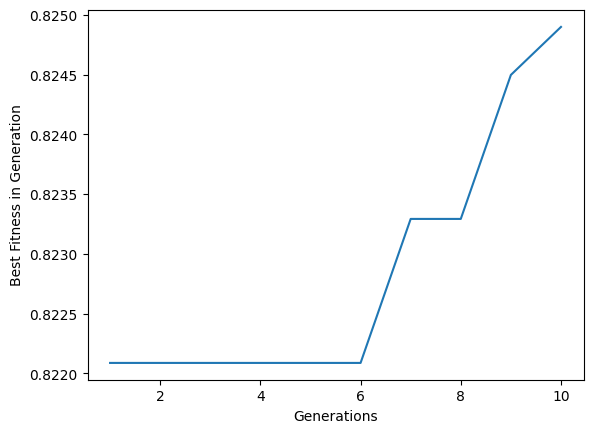

In [68]:
gens = list(range(1,11))
plt.plot(gens, best_fitness)
plt.xlabel("Generations")
plt.ylabel("Best Fitness in Generation")
plt.show()

## Percobaan 2

In [15]:
#seleksi
# binary_string = bin(best_individual)[2:]
# padded_binary_string_bin = binary_string.zfill(120)
boolean_mask = [bool(int(x)) for x in best_individual]
X_train_selected = X_train[:, boolean_mask]
X_test_selected = X_test[:, boolean_mask]

#waktu untuk train dan prediksi dengan seleksi fitur
start_time = time.time()

svm = SVC(kernel='poly', decision_function_shape='ovr', random_state=42)
svm.fit(X_train_selected, y_train)
y_pred = svm.predict(X_test_selected)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi dengan seleksi fitur: ", acc)

end_time = time.time()
total_duration = end_time - start_time
print(f"\nTotal Waktu yang Dibutuhkan untuk train dengan seleksi fitur: {str(timedelta(seconds=total_duration))}")

print("jumlah fitur hasil GA : ", best_individual.count('1'))

Akurasi dengan seleksi fitur:  0.8180722891566266

Total Waktu yang Dibutuhkan untuk train dengan seleksi fitur: 0:00:02.263632
jumlah fitur hasil GA :  53


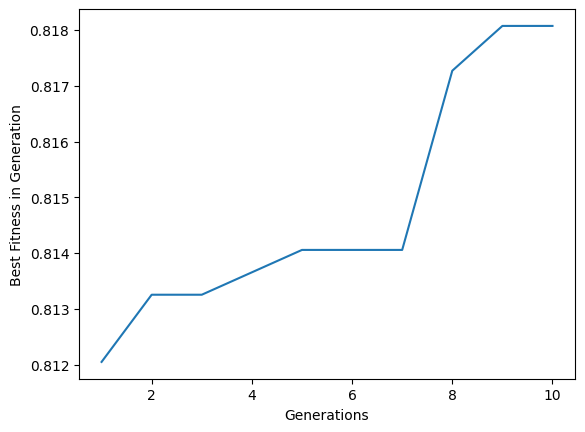

In [18]:
gens = list(range(1,11))
plt.plot(gens, best_fitness)
plt.xlabel("Generations")
plt.ylabel("Best Fitness in Generation")
plt.show()

## Percobaan 3

In [20]:
#seleksi
# binary_string = bin(best_individual)[2:]
# padded_binary_string_bin = binary_string.zfill(120)
boolean_mask = [bool(int(x)) for x in best_individual]
X_train_selected = X_train[:, boolean_mask]
X_test_selected = X_test[:, boolean_mask]

#waktu untuk train dan prediksi dengan seleksi fitur
start_time = time.time()

svm = SVC(kernel='poly', decision_function_shape='ovr', random_state=42)
svm.fit(X_train_selected, y_train)
y_pred = svm.predict(X_test_selected)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi dengan seleksi fitur: ", acc)

end_time = time.time()
total_duration = end_time - start_time
print(f"\nTotal Waktu yang Dibutuhkan untuk train dengan seleksi fitur: {str(timedelta(seconds=total_duration))}")

print("jumlah fitur hasil GA : ", best_individual.count('1'))

Akurasi dengan seleksi fitur:  0.821285140562249

Total Waktu yang Dibutuhkan untuk train dengan seleksi fitur: 0:00:02.171162
jumlah fitur hasil GA :  51


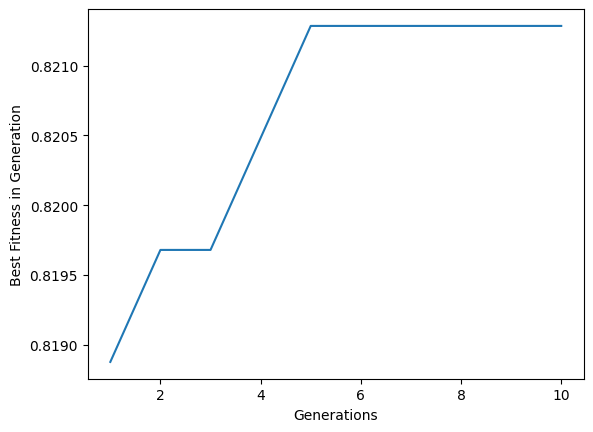

In [21]:
gens = list(range(1,11))
plt.plot(gens, best_fitness)
plt.xlabel("Generations")
plt.ylabel("Best Fitness in Generation")
plt.show()